An Artificially Intelligent Marketing Lead Prioritization Tool 
-Krishnan Narayanan, Adithya Vibakar

Importing the Necessary Modules


In [1]:
from random import uniform
import matplotlib.pyplot as plt
import pandas as pd
from random import uniform
from numpy import e
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

In [2]:
pd.set_option('display.max_columns', None)

Loading The Dataset

In [3]:
df = pd.read_csv("/content/df1.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,others,India,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,others,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,others,India,others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,others,India,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [4]:
df.shape

(9240, 30)

Data Discription and Data visualization

In [5]:
df.info

<bound method DataFrame.info of                                Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [7]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

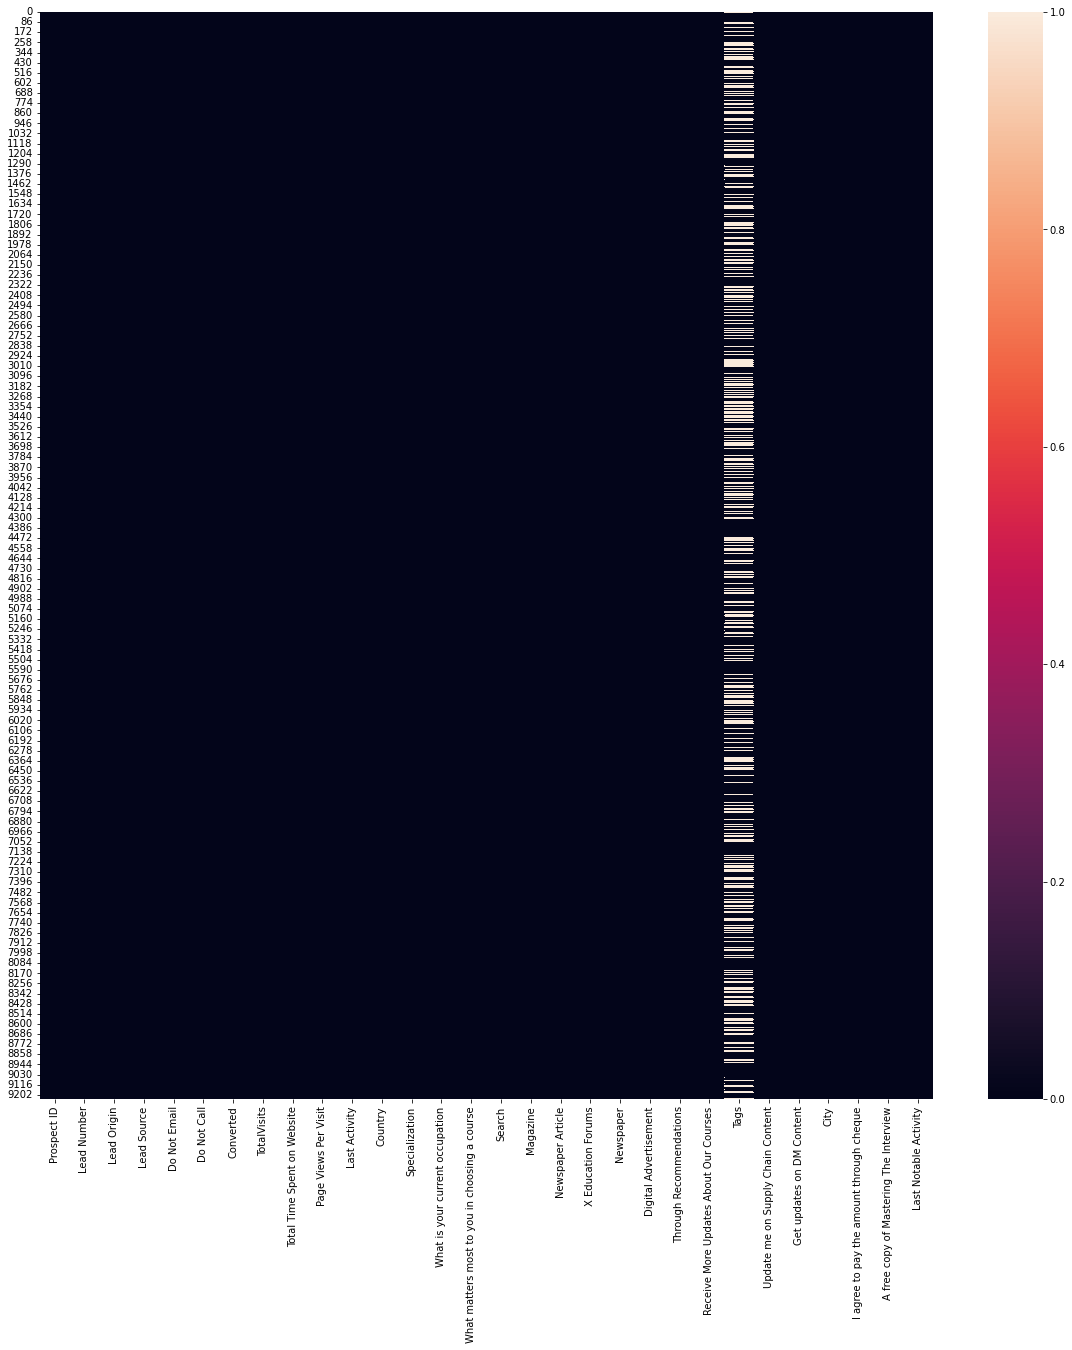

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna())

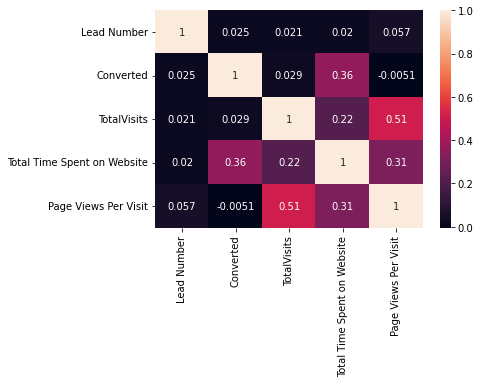

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df["City"].value_counts()

Mumbai    6891
others    2349
Name: City, dtype: int64

In [11]:
num_cols=df.select_dtypes(exclude=['object']).columns.tolist()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

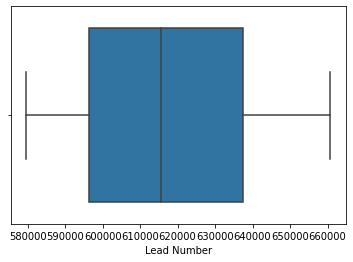

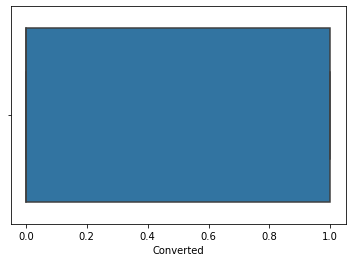

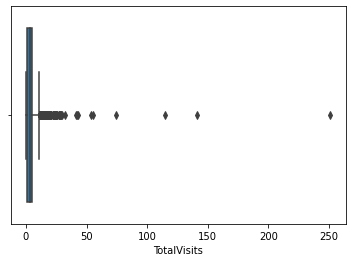

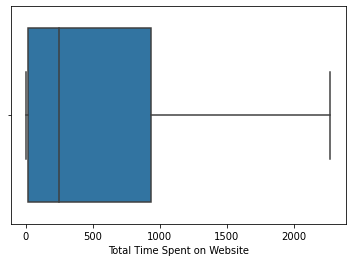

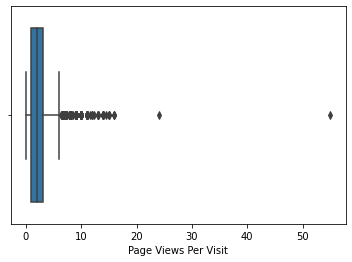

In [12]:
for i in num_cols:
    plt.figure()
    sns.boxplot(df[i])

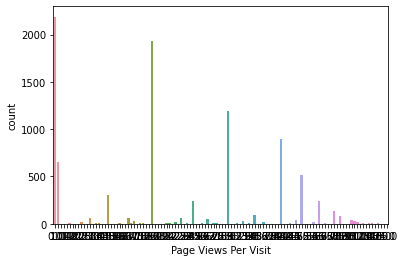

In [13]:
sns.countplot(x=df[i])

Data Encoding

In [14]:
df['A free copy of Mastering The Interview']=df['A free copy of Mastering The Interview'].replace(["Yes"],1)
df['A free copy of Mastering The Interview']=df['A free copy of Mastering The Interview'].replace(["No"],0)

Removing Less Influential Data 

In [15]:
df.drop(['Prospect ID', 'Lead Number','Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                                'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
                                'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                                'Get updates on DM Content', 'I agree to pay the amount through cheque','Last Activity', 'Last Notable Activity', 'Tags','Country'], axis=1, inplace=True)
df.shape

(9240, 11)

In [16]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Unspecified,Unemployed,Better Career Prospects,Mumbai,0
1,API,Organic Search,0,5.0,674,2.5,Unspecified,Unemployed,Better Career Prospects,Mumbai,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,others,Student,Better Career Prospects,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,others,Unemployed,Better Career Prospects,Mumbai,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Unspecified,Unemployed,Better Career Prospects,Mumbai,0


Removing Dummy Data

In [17]:
column_names = ['Lead Source', 'Lead Origin', 'Specialization', 'City']

for column_name in column_names:
    dummies = pd.get_dummies(df[column_name])
    dummies.drop('others', axis=1, inplace=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column_name, axis=1, inplace=True)
    print("Dummies created for: ", column_name)

df.head()

Dummies created for:  Lead Source
Dummies created for:  Lead Origin
Dummies created for:  Specialization
Dummies created for:  City


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Direct Traffic,Google,Olark Chat,Organic Search,API,Landing Page Submission,Finance Management,Unspecified,Mumbai
0,0,0.0,0,0.0,Unemployed,Better Career Prospects,0,0,0,1,0,1,0,0,1,1
1,0,5.0,674,2.5,Unemployed,Better Career Prospects,0,0,0,0,1,1,0,0,1,1
2,1,2.0,1532,2.0,Student,Better Career Prospects,1,1,0,0,0,0,1,0,0,1
3,0,1.0,305,1.0,Unemployed,Better Career Prospects,0,1,0,0,0,0,1,0,0,1
4,1,2.0,1428,1.0,Unemployed,Better Career Prospects,0,0,1,0,0,0,1,0,1,1


In [18]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', 'Working Professional', 'Businessman',
       'Other', 'Housewife'], dtype=object)

Data Encoding

In [19]:
df['What is your current occupation']=df['What is your current occupation'].replace(["Unemployed"],0)
df['What is your current occupation']=df['What is your current occupation'].replace(["Student"],1)
df['What is your current occupation']=df['What is your current occupation'].replace(["Working Professional"],2)
df['What is your current occupation']=df['What is your current occupation'].replace(["Businessman"],3)
df['What is your current occupation']=df['What is your current occupation'].replace(["Other"],4)
df['What is your current occupation']=df['What is your current occupation'].replace(["Housewife"],5)



In [20]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', 'Flexibility & Convenience', 'Other'],
      dtype=object)

In [21]:
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace(["Better Career Prospects"],0)
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace(["Flexibility & Convenience"],1)
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].replace(["Other"],2)

Assigning Target Feature Variable

In [22]:
X = df.drop('Converted', axis=1)
X['Converted']=df['Converted'].copy()

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Direct Traffic,Google,Olark Chat,Organic Search,API,Landing Page Submission,Finance Management,Unspecified,Mumbai,Converted
0,0.0,0,0.0,0,0,0,0,0,1,0,1,0,0,1,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,1,0,0,1,1,0
2,2.0,1532,2.0,1,0,1,1,0,0,0,0,1,0,0,1,1
3,1.0,305,1.0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,2.0,1428,1.0,0,0,0,0,1,0,0,0,1,0,1,1,1


In [23]:
scaler = StandardScaler()
columns_to_be_scaled = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X[columns_to_be_scaled] = scaler.fit_transform(X[columns_to_be_scaled])
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Direct Traffic,Google,Olark Chat,Organic Search,API,Landing Page Submission,Finance Management,Unspecified,Mumbai,Converted
0,-0.713593,-0.889974,-1.098699,0,0,0,0,0,1,0,1,0,0,1,1,0
1,0.324018,0.339972,0.066441,0,0,0,0,0,0,1,1,0,0,1,1,0
2,-0.298549,1.905689,-0.166587,1,0,1,1,0,0,0,0,1,0,0,1,1
3,-0.506071,-0.333396,-0.632643,0,0,0,1,0,0,0,0,1,0,0,1,0
4,-0.298549,1.715905,-0.632643,0,0,0,0,1,0,0,0,1,0,1,1,1


Clustering Using K-Means

In [24]:
df1_for_clustering=X.copy()
df1_for_clustering=df1_for_clustering.drop(['Converted'],axis=1)
df1_for_clustering

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Direct Traffic,Google,Olark Chat,Organic Search,API,Landing Page Submission,Finance Management,Unspecified,Mumbai
0,-0.713593,-0.889974,-1.098699,0,0,0,0,0,1,0,1,0,0,1,1
1,0.324018,0.339972,0.066441,0,0,0,0,0,0,1,1,0,0,1,1
2,-0.298549,1.905689,-0.166587,1,0,1,1,0,0,0,0,1,0,0,1
3,-0.506071,-0.333396,-0.632643,0,0,0,1,0,0,0,0,1,0,0,1
4,-0.298549,1.715905,-0.632643,0,0,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0.946584,2.476865,0.145670,0,0,0,1,0,0,0,0,1,0,0,1
9236,-0.298549,-0.455661,-0.166587,0,0,1,1,0,0,0,0,1,0,0,1
9237,-0.298549,-0.526830,-0.166587,0,0,1,1,0,0,0,0,1,0,0,1
9238,-0.091027,0.020624,0.299469,0,0,0,0,1,0,0,0,1,0,0,0


In [25]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1_for_clustering)
    distortions.append(kmeanModel.inertia_)

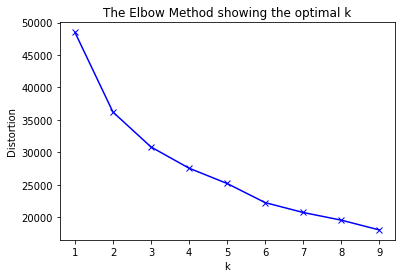

In [26]:
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df1_for_clustering)

KMeans(n_clusters=2)

In [28]:
temp_df=pd.DataFrame()

In [29]:
temp_df["Predict"]=kmeanModel.predict(df1_for_clustering)
temp_df["Actual"]=df['Converted']

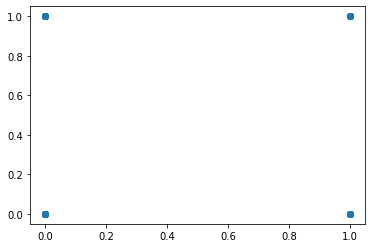

In [30]:
plt.scatter(temp_df["Predict"], temp_df["Actual"])

In [31]:
kmeanModel.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(temp_df["Actual"], temp_df["Predict"]))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      5679
           1       0.41      0.68      0.51      3561

    accuracy                           0.50      9240
   macro avg       0.54      0.53      0.50      9240
weighted avg       0.56      0.50      0.50      9240



Particle Swarm Optimization

In [33]:
X.to_csv(r'traindataframe.csv', index=False, header=True)
df2=pd.read_csv("/content/traindataframe.csv")
df2

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Direct Traffic,Google,Olark Chat,Organic Search,API,Landing Page Submission,Finance Management,Unspecified,Mumbai,Converted
0,-0.713593,-0.889974,-1.098699,0,0,0,0,0,1,0,1,0,0,1,1,0
1,0.324018,0.339972,0.066441,0,0,0,0,0,0,1,1,0,0,1,1,0
2,-0.298549,1.905689,-0.166587,1,0,1,1,0,0,0,0,1,0,0,1,1
3,-0.506071,-0.333396,-0.632643,0,0,0,1,0,0,0,0,1,0,0,1,0
4,-0.298549,1.715905,-0.632643,0,0,0,0,1,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0.946584,2.476865,0.145670,0,0,0,1,0,0,0,0,1,0,0,1,1
9236,-0.298549,-0.455661,-0.166587,0,0,1,1,0,0,0,0,1,0,0,1,0
9237,-0.298549,-0.526830,-0.166587,0,0,1,1,0,0,0,0,1,0,0,1,0
9238,-0.091027,0.020624,0.299469,0,0,0,0,1,0,0,0,1,0,0,0,1


In [34]:
df2 = X.sample(3000).copy()
for i in df2:
  if(i!='Converted'):
    df2[i] = (df2[i] - df2[i].mean())/df2[i].std()
df2

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Direct Traffic,Google,Olark Chat,Organic Search,API,Landing Page Submission,Finance Management,Unspecified,Mumbai,Converted
4024,-0.796697,-0.888102,-1.141008,-0.322412,-0.018257,-0.693246,-0.612691,-0.669646,2.082458,-0.393297,1.259237,-1.058899,-0.353296,1.322569,0.590083,0
7731,-0.796697,-0.888102,-1.141008,-0.322412,-0.018257,-0.693246,-0.612691,-0.669646,2.082458,-0.393297,1.259237,-1.058899,-0.353296,1.322569,0.590083,0
6313,1.548139,1.301611,0.070708,-0.322412,-0.018257,1.442009,-0.612691,-0.669646,-0.480042,2.541758,-0.793867,0.944062,-0.353296,-0.755852,-1.694111,1
6629,-0.796697,-0.888102,-1.141008,-0.322412,-0.018257,-0.693246,-0.612691,-0.669646,2.082458,-0.393297,1.259237,-1.058899,-0.353296,-0.755852,-1.694111,1
1310,-0.093246,1.583276,-0.413979,-0.322412,-0.018257,-0.693246,-0.612691,1.492828,-0.480042,-0.393297,1.259237,-1.058899,-0.353296,1.322569,0.590083,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6386,-0.796697,-0.888102,-1.141008,3.047747,-0.018257,-0.693246,-0.612691,-0.669646,2.082458,-0.393297,1.259237,-1.058899,-0.353296,-0.755852,0.590083,1
666,-0.327730,-0.542836,-0.171636,-0.322412,-0.018257,-0.693246,-0.612691,1.492828,-0.480042,-0.393297,-0.793867,0.944062,-0.353296,-0.755852,0.590083,0
5872,-0.796697,-0.888102,-1.141008,-0.322412,-0.018257,-0.693246,-0.612691,-0.669646,-0.480042,-0.393297,-0.793867,-1.058899,-0.353296,1.322569,0.590083,1
3297,0.844688,-0.733641,0.555394,-0.322412,-0.018257,1.442009,-0.612691,-0.669646,-0.480042,2.541758,-0.793867,0.944062,-0.353296,-0.755852,-1.694111,0


In [35]:
TRAIN = df2.sample(frac=0.7).fillna(0.00)
TEST = df2.drop(TRAIN.index).fillna(0.00)
TRAIN=TRAIN.values.tolist()
TEST=TEST.values.tolist()

In [36]:
TRAIN

[[-0.3277298694439043,
  0.5347571857456573,
  -0.1716355276724257,
  -0.3224118513449075,
  -0.018257418583505537,
  1.4420085904084528,
  1.6315992139971123,
  -0.6696462067163856,
  -0.48004164207300337,
  -0.3932973848736117,
  -0.7938668891452519,
  0.9440624387127764,
  -0.35329558839363207,
  -0.7558524351942444,
  -1.6941106081623396,
  0.0],
 [0.1412372702325626,
  -0.6700397034076602,
  -0.6563219144727054,
  -0.3224118513449075,
  -0.018257418583505537,
  -0.6932459857146264,
  -0.61269131419699,
  1.4928280883849674,
  -0.48004164207300337,
  -0.3932973848736117,
  1.2592371345062616,
  -1.0588988881177248,
  -0.35329558839363207,
  1.3225685598403414,
  0.5900834702587924,
  0.0],
 [0.6102044099090296,
  1.7795322522162793,
  1.767110019528693,
  -0.3224118513449075,
  -0.018257418583505537,
  -0.6932459857146264,
  -0.61269131419699,
  -0.6696462067163856,
  -0.48004164207300337,
  2.5417577261234903,
  -0.7938668891452519,
  0.9440624387127764,
  -0.35329558839363207,
  

In [37]:
MSE, TRP, TEP = [], [], []

In [38]:
FEATURES = len(TRAIN[0][:-1])

In [39]:
CLASSES = 2

In [40]:
HIDDEN_SIZE = 10

In [41]:
DIMENSIONS = (HIDDEN_SIZE * (FEATURES+1)) + (CLASSES * (HIDDEN_SIZE+1))
DIMENSIONS

182

In [42]:
EPOCHS, AXIS_RANGE = 100, [-0.5,0.5]

In [43]:
SWARM_SIZE = 100

In [44]:
W, C_1, C_2, BOUND = 0.5,1.5,1.2,3

In [45]:
def move_particles(swarm, best, dim, ine_c, cog_c, soc_c):
	for particle in swarm: 
		new_pos = [0 for _ in range(dim)]
		new_vel = [0 for _ in range(dim)]
		for di in range(dim): 
			weight = ine_c * particle.get_vel()[di]
			cognitive = cog_c * uniform(0.00, 1.00)
			cognitive *= (particle.get_best_pos()[di] - particle.get_pos()[di])
			social = soc_c * uniform(0.00, 1.00)
			social *= (best[di] - particle.get_pos()[di])
			new_vel[di] = weight + cognitive + social
			new_pos[di] = particle.get_pos()[di] + new_vel[di]
		particle.set_pos(new_pos)
		particle.set_vel(new_vel)

In [46]:
def activation_function(z):
	return z if z >= 0 else 0.01 * z


In [47]:
def feed_forward(network, example, act):
	layer_input, layer_output = example, []
	for layer in network:
		for neuron in layer:
			summ = summing_function(neuron['w'], layer_input)
			neuron['o'] = act(summ)
			layer_output.append(neuron['o'])
		layer_input, layer_output = layer_output, []
	return layer_input

def summing_function(weights, inputs):
	bias = weights[-1]
	summ = 0.00 
	for i in range(len(weights)-1):
		summ += (weights[i] * float(inputs[i]))
	return summ + bias

def mse(network, classes, training, act):
	summ = 0.00
	for example in training:
		target = [0 for _ in range(classes)]
		target[int(example[-1])] = 1
		actual = feed_forward(network, example, act)
		summ += sse(actual, target)
	return summ / len(training)

def sse(actual, target):
	summ = 0.00
	for i, _ in enumerate(actual):
		summ += (actual[i] - target[i])**2
	return summ

def performance_measure(network, data, act):
	correct, total = 0, 0
	for example in data:
		if check_output(network, example, act) == float(example[-1]):
			correct += 1
		total += 1
	return 100*(correct / total)

def check_output(network, example, act):
	output = feed_forward(network, example, act)
	return output.index(max(output))

def initialize_population(agent_type, size, dim, axis_range):
	population = []
	for _ in range(size):
		pos = [uniform(axis_range[0], axis_range[1]) for _ in range(dim)]
		agent = agent_type(pos) 
		population.append(agent)
	return population

def initialize_network(weights, n, h, o):
	w = iter(weights)
	neural_network = [] 
	neural_network.append([{'w':[next(w) for i in range(n+1)]} \
		for j in range(h)])
	neural_network.append([{'w':[next(w) for i in range(h+1)]} \
		for j in range(o)])
	return neural_network


In [48]:
class Particle:

	def __init__(self, pos):
		self.pos, self.vel = pos, [0.00 for _ in range(len(pos))]
		network = initialize_network(self.pos, FEATURES, \
			HIDDEN_SIZE, CLASSES)
		self.fit = mse(network, CLASSES, TRAIN, activation_function)
		self.best_pos, self.best_fit = self.pos, self.fit

	def set_pos(self, pos):
		self.pos = pos
		if not any(p < -BOUND for p in pos)\
		and not any(p > BOUND for p in pos):
			network = initialize_network(self.pos, FEATURES, \
				HIDDEN_SIZE, CLASSES)
			fitness = mse(network, CLASSES, TRAIN, activation_function)
			if fitness < self.best_fit:
				self.fit = fitness
				self.best_fit = self.fit
				self.best_pos = self.pos

	def set_vel(self, vel):
		self.vel = vel

	def get_pos(self):
		return self.pos

	def get_vel(self):
		return self.vel

	def get_best_pos(self):
		return self.best_pos

	def get_fit(self):
		return self.fit

	def __getitem__(self, key):
		return self.pos[key]
	
	def __lt__(self, other):
		return self.fit < other.fit


In [49]:
def particle_swarm_optimization(dim, epochs, swarm_size, axis_range, w, c1, c2):

	print('Epoch, MSE, Train. Acc%, Test Acc%')
	swarm = initialize_population(Particle, swarm_size, dim, axis_range)
	for e in range(1, epochs+1):
		swarm.sort()
		MSE.append(swarm[0].get_fit())
		network = initialize_network(swarm[0].get_pos(), FEATURES, \
			HIDDEN_SIZE, CLASSES)
		TRP.append(performance_measure(network, TRAIN, activation_function))
		TEP.append(performance_measure(network, TEST, activation_function))
		move_particles(swarm, swarm[0], dim, w, c1, c2)
		print(f'{e}, {MSE[-1]:.4f}, {TRP[-1]:.2f}, {TEP[-1]:.2f}')

In [50]:
particle_swarm_optimization(DIMENSIONS, EPOCHS, SWARM_SIZE, AXIS_RANGE, \
	W, C_1, C_2)


Epoch, MSE, Train. Acc%, Test Acc%
1, 0.6990, 46.05, 46.44
2, 0.6210, 59.62, 62.22
3, 0.6210, 47.62, 49.33
4, 0.6053, 65.76, 66.22
5, 0.5783, 62.29, 63.00
6, 0.5783, 62.57, 63.00
7, 0.5783, 61.62, 62.11
8, 0.5419, 66.81, 66.89
9, 0.5419, 58.00, 56.00
10, 0.5419, 66.67, 65.11
11, 0.5294, 64.38, 63.44
12, 0.4958, 66.67, 64.78
13, 0.4958, 65.14, 64.00
14, 0.4958, 66.29, 65.33
15, 0.4958, 66.24, 64.00
16, 0.4893, 67.62, 66.22
17, 0.4860, 66.48, 65.22
18, 0.4713, 68.62, 69.44
19, 0.4673, 66.48, 67.33
20, 0.4493, 67.81, 67.11
21, 0.4493, 66.33, 67.33
22, 0.4437, 68.38, 69.00
23, 0.4363, 68.33, 68.00
24, 0.4288, 69.52, 69.78
25, 0.4246, 69.29, 69.78
26, 0.4231, 69.48, 70.22
27, 0.4203, 70.43, 71.44
28, 0.4144, 72.52, 74.11
29, 0.4087, 70.90, 72.44
30, 0.4063, 70.19, 70.89
31, 0.4062, 73.14, 72.89
32, 0.4062, 75.24, 73.22
33, 0.4043, 75.76, 74.33
34, 0.4031, 69.95, 72.11
35, 0.4031, 70.00, 71.22
36, 0.4008, 75.19, 74.44
37, 0.3968, 71.95, 72.67
38, 0.3968, 73.38, 73.89
39, 0.3968, 71.90, 71.89

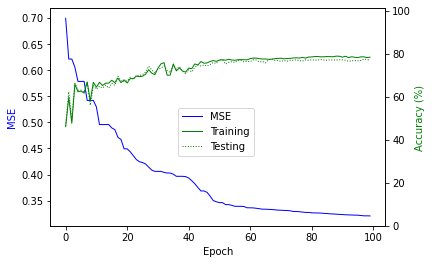

<Figure size 432x288 with 0 Axes>

In [51]:
x = range(0, EPOCHS)
fig, ax2 = plt.subplots()
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MSE', color='blue')
ax2.plot(x, MSE, '-', c='blue', lw='1', label='MSE')
ax1 = ax2.twinx()
ax1.set_ylabel('Accuracy (%)', color='green')
ax1.plot(x, TRP, '-', c='green', lw='1', label='Training')
ax1.plot(x, TEP, ':', c='green', lw='1', label='Testing')
fig.legend(loc='center')
ax1.set_ylim(0, 101)
plt.show()
plt.clf()

Artificial Neural Network

In [52]:
from tensorflow.keras import models,layers

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(['Converted'],axis=1), X['Converted'], test_size=0.30, random_state=42)

In [55]:
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Direct Traffic,Google,Olark Chat,Organic Search,API,Landing Page Submission,Finance Management,Unspecified,Mumbai
4715,-0.713593,-0.889974,-1.098699,0,0,0,0,0,1,0,1,0,0,1,1
7132,-0.298549,1.387433,-0.632643,0,0,0,0,0,0,1,1,0,0,1,0
8954,0.116495,-0.183759,-0.478845,0,0,1,1,0,0,0,0,1,0,0,1
5283,14.643045,1.316264,4.647772,0,0,0,1,0,0,0,0,1,0,1,0
3003,-0.091027,1.580866,0.299469,0,0,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.091027,-0.652744,0.299469,0,0,0,0,1,0,0,0,1,0,0,1
5191,-0.713593,-0.889974,-1.098699,0,0,0,0,0,1,0,1,0,0,1,1
5390,-0.713593,-0.889974,-1.098699,0,0,0,0,0,0,0,0,0,0,0,0
860,-0.091027,-0.563326,0.299469,0,0,0,0,1,0,0,0,1,0,0,0


In [56]:
np.array(X_train)

array([[-0.71359317, -0.88997364, -1.09869938, ...,  0.        ,
         1.        ,  1.        ],
       [-0.29854889,  1.38743265, -0.63264334, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.11649538, -0.18375871, -0.47884484, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.71359317, -0.88997364, -1.09869938, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09102676, -0.56332643,  0.29946875, ...,  0.        ,
         0.        ,  0.        ],
       [-0.29854889,  2.41117058, -0.63264334, ...,  0.        ,
         1.        ,  1.        ]])

In [57]:

model = models.Sequential()
model.add(layers.Dense(units=12, activation='relu', input_shape=np.array(X_train)[0].shape))

model.add(layers.Dense(units=8, activation='relu'))

model.add(layers.Dense(units=1, activation='sigmoid'))

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
model.fit(
      x=X_train
    , y=y_train
    , validation_split=0.1
    , batch_size=32
    , epochs=100
    , verbose=2
)

Epoch 1/100
182/182 - 3s - loss: 0.6191 - accuracy: 0.6793 - val_loss: 0.5750 - val_accuracy: 0.7419 - 3s/epoch - 16ms/step
Epoch 2/100
182/182 - 1s - loss: 0.5450 - accuracy: 0.7399 - val_loss: 0.5255 - val_accuracy: 0.7666 - 868ms/epoch - 5ms/step
Epoch 3/100
182/182 - 1s - loss: 0.5132 - accuracy: 0.7612 - val_loss: 0.5051 - val_accuracy: 0.7883 - 795ms/epoch - 4ms/step
Epoch 4/100
182/182 - 1s - loss: 0.4983 - accuracy: 0.7779 - val_loss: 0.5031 - val_accuracy: 0.7852 - 802ms/epoch - 4ms/step
Epoch 5/100
182/182 - 1s - loss: 0.4900 - accuracy: 0.7779 - val_loss: 0.4984 - val_accuracy: 0.7821 - 1s/epoch - 6ms/step
Epoch 6/100
182/182 - 1s - loss: 0.4851 - accuracy: 0.7827 - val_loss: 0.5007 - val_accuracy: 0.7790 - 524ms/epoch - 3ms/step
Epoch 7/100
182/182 - 0s - loss: 0.4819 - accuracy: 0.7832 - val_loss: 0.4968 - val_accuracy: 0.7883 - 369ms/epoch - 2ms/step
Epoch 8/100
182/182 - 0s - loss: 0.4786 - accuracy: 0.7878 - val_loss: 0.4936 - val_accuracy: 0.7790 - 381ms/epoch - 2ms/st